# KNN Models

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
sys.path.append('../lib')

import numpy as np
import pandas as pd

import torch
import pytorch_common.util as pu

import model as ml
import data.dataset as ds

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [6]:
pu.set_device_name('gpu')
cpu = torch.device("cpu")

In [7]:
pu.get_device()

device(type='cuda', index=0)

In [8]:
torch.cuda.is_available()

True

In [9]:
torch.__version__

'1.11.0'

## Carga de dataset

1. importamos los archivos de peliculas y ratings preprocesados prebiamente en mongodb:

In [10]:
def features_fn(obs, device): return torch.tensor(obs[['user_seq', 'movie_seq']].values).to(device)
def target_fn(obs, device):   return torch.tensor(obs['user_movie_rating'].values).to(device)

In [11]:
dataset = ds.MovieLensTMDbJSONDataset(transform=features_fn, target_transform=target_fn, device=cpu)

In [12]:
user_predictor = ml.KNNUserBasedPredictor.from_data_frame(
    data          = dataset.data,
    user_seq_col  = 'user_seq',
    movie_seq_col = 'movie_seq',
    rating_col    = 'user_movie_rating',
    distance      = ml.CosineDistance()
)
# user_predictor.plot()

build ratting matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 199791/199791 [100%] in 9.1s (22043.10/s)               
build distances matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 13280/13280 [100%] in 3:09.6 (70.06/s)                (76.3/s, eta: 2:41)  1033/13280 [8%] in 14s (76.0/s, eta: 2:41) 1064/13280 [8%] in 14s (75.7/s, eta: 2:41) 1165/13280 [9%] in 15s (75.2/s, eta: 2:41) 1197/13280 [9%] in 16s (75.0/s, eta: 2:41) |▉▉▉▋                                    | ↑↗→ 1256/13280 [9%] in 17s (74.7/s, eta: 2:41) 1312/13280 [10%] in 18s (74.5/s, eta: 2:41) ↑↗→ 1339/13280 [10%] in 18s (74.4/s, eta: 2:41) |▉▉▉▉▏                                   | →↘↓ 1375/13280 [10%] in 19s (74.3/s, eta: 2:40) 1382/13280 [10%] in 19s (74.3/s, eta: 2:40) ↗→↘ 1427/13280 [11%] in 19s (74.1/s, eta: 2:40) ↖↑↗ 1448/13280 [11%] in 20s (74.0/s, eta: 2:40) ↙←↖ 1497/13280 [11%] in 20s (73.9/s, eta: 2:40) 1511/13280 [11%] in 20s (73.8/s, eta: 2:39) ↑↗→ 1536/13280 [12%] in 21s (73.8/s, eta: 2:39) 1564/13280 [1

In [15]:
item_predictor = ml.KNNItemBasedPredictor.from_data_frame(
    data          = dataset.data,
    user_seq_col  = 'user_seq',
    movie_seq_col = 'movie_seq',
    rating_col    = 'user_movie_rating',
    distance      = ml.CosineDistance()
)
# item_predictor.plot()

build ratting matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 199791/199791 [100%] in 9.2s (21733.39/s)               
build distances matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 22081/22081 [100%] in 8:22.2 (43.97/s)                ↘↓↙ 208/22081 [1%] in 3s (73.7/s, eta: 4:55) 210/22081 [1%] in 3s (73.1/s, eta: 4:57)  212/22081 [1%] in 3s (72.5/s, eta: 4:59) 


In [38]:
n_samples   = 50
n_neighbors = 5000
batch_size  = 100

validator = ml.Validator(
    n_samples, 
    batch_size,
    metrics_fn = {
        'mse': mean_squared_error,
        'mae': mean_absolute_error
    },
    predictors=[user_predictor, item_predictor]
)

In [39]:
summary = validator.validate(dataset, n_neighbors=n_neighbors)

|▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 50/50 [100%] in 20:06.2 (0.04/s)                                             


Predictor: KNNItemBasedPredictor

Range: (0.7145852219094735, 2.168692788956123)



<Figure size 1080x288 with 2 Axes>

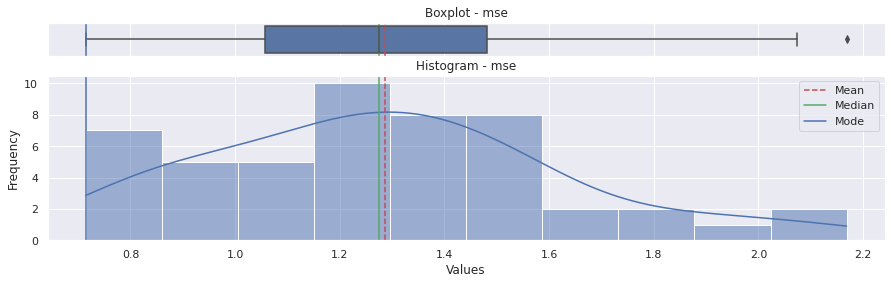


Metrics:



,mse
count,50.000000
mean,1.286861
std,0.340543
min,0.714585
25%,1.057718
50%,1.275534
75%,1.480944
max,2.168693


Predictor: KNNUserBasedPredictor

Range: (0.7347293496098188, 1.9090600931573056)



<Figure size 1080x288 with 2 Axes>

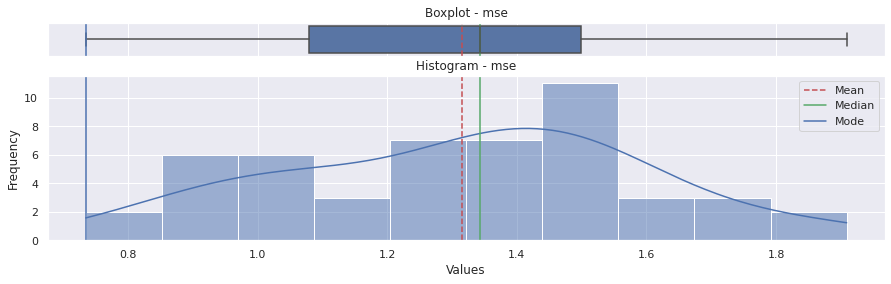


Metrics:



,mse
count,50.000000
mean,1.316089
std,0.280364
min,0.734729
25%,1.079162
50%,1.342923
75%,1.499722
max,1.909060


Predictor: KNNItemBasedPredictor

Range: (0.5982015538215637, 0.9535628724098205)



<Figure size 1080x288 with 2 Axes>

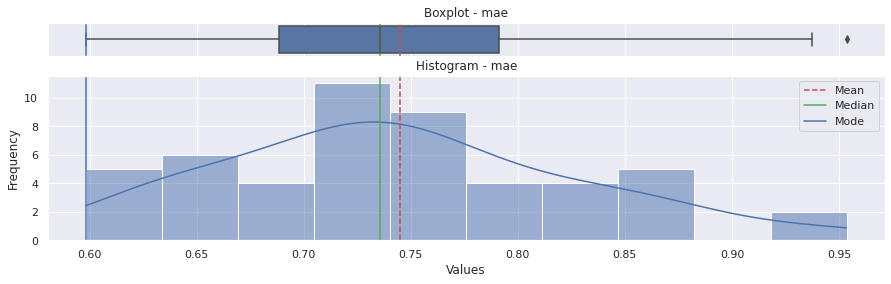


Metrics:



,mae
count,50.000000
mean,0.744752
std,0.083297
min,0.598202
25%,0.688607
50%,0.735686
75%,0.791040
max,0.953563


Predictor: KNNUserBasedPredictor

Range: (0.6409344816207886, 0.9661083602905274)



<Figure size 1080x288 with 2 Axes>

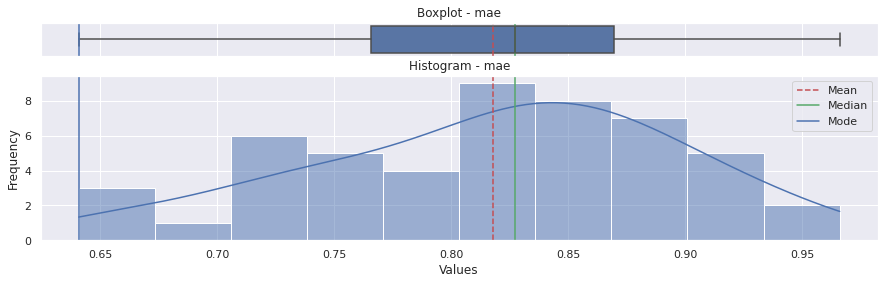


Metrics:



,mae
count,50.000000
mean,0.817924
std,0.078235
min,0.640934
25%,0.765956
50%,0.827258
75%,0.869679
max,0.966108


In [40]:
summary.plot()